## Import Libraries

In [40]:
import os
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.dates as mdates 
xformatter = mdates.DateFormatter('%H:%M') # for time axis plots

# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# teste


import sklearn
from scipy.optimize import curve_fit

import warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [41]:
data = pd.read_csv('marketing_campaign.csv', sep="\t")

In [42]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [44]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [45]:
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [46]:
data.shape

(2240, 29)

## Data conversion to correct dtypes

Here we found that the variable Dt_Custumer, wich is the date of customer's enrollment with the company, is a object dtype. For better results we changed it, so it could be a datetime64[ns] dtype.

In [47]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## Data Understanding

In [49]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


In [50]:
data["Age"] = 2023 - data["Year_Birth"]
data["Kids"] = data["Kidhome"] + data["Teenhome"]
data["Is_Parent"] = data["Kids"].apply(lambda kids: 1 if kids > 0 else 0)
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
data["Marital_Status"]=data["Marital_Status"].replace({"Married":"Together", "Together":"Together","Absurd":"Single", "Widow":"Single", "YOLO":"Single", "Divorced":"Single", "Single":"Single", "Alone":"Single"})
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold","NumDealsPurchases": "DealsPurch", "NumWebPurchases": "WebPurch", "NumCatalogPurchases" : "CatalogPurch", "NumStorePurchases": "StorePurch", "NumWebVisitsMonth": "WebVisits"})
to_drop = ["Year_Birth","Z_CostContact", "Z_Revenue","Kidhome","Teenhome"]
data = data.drop(to_drop, axis=1)

In [51]:
data.describe()

,ID,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,Is_Parent,Spent
count,2240.000000,2216.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,52247.251354,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,54.194196,0.950446,0.715179,605.798214
min,0.000000,1730.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,5.000000
25%,2828.250000,35303.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,0.000000,0.000000,68.750000
50%,5458.500000,51381.500000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,1.000000,1.000000,396.000000
75%,8427.750000,68522.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,1.000000,1.000000,1045.500000
max,11191.000000,666666.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,130.000000,3.000000,1.000000,2525.000000
std,3246.662198,25173.076661,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069,0.751803,0.451430,602.249288


In [52]:
data["Age"].value_counts()

Age
47     89
52     87
48     83
51     79
45     77
53     77
50     74
58     74
54     71
49     69
67     55
65     53
44     53
71     52
46     52
55     51
64     51
57     50
69     50
68     49
63     49
41     45
60     45
56     44
61     44
66     43
72     43
40     42
37     42
59     42
43     39
42     39
39     38
62     36
70     35
38     32
34     30
74     30
73     29
35     29
36     27
75     21
33     18
77     16
76     16
32     15
31     13
78      8
80      7
79      7
30      5
28      5
29      3
27      2
124     1
82      1
130     1
123     1
83      1
Name: count, dtype: int64

In [53]:
data_clean = data.drop(data.loc[data["Age"] < 100].index)
print(data_clean)

        ID      Education Marital_Status   Income Dt_Customer  Recency  Wines  \
192   7829  Undergraduate         Single  36640.0  2013-09-26       99     15   
239  11004  Undergraduate         Single  60182.0  2014-05-17       23      8   
339   1150   Postgraduate       Together  83532.0  2013-09-26       36    755   

     Fruits  Meat  Fish  ...  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
192       6     8     7  ...             0             0             0   
239       0     5     7  ...             0             0             0   
339     144   562   104  ...             0             1             0   

     AcceptedCmp2  Complain  Response  Age  Kids  Is_Parent  Spent  
192             0         1         0  123     1          1     65  
239             0         0         0  130     1          1     22  
339             0         0         0  124     0          0   1853  

[3 rows x 28 columns]


In [54]:
data["Marital_Status"].value_counts()

Marital_Status
Together    1444
Single       796
Name: count, dtype: int64

In [55]:
data["Education"].value_counts()

Education
Graduate         1127
Postgraduate      856
Undergraduate     257
Name: count, dtype: int64

In [56]:
data["Income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [57]:
data.nunique()

ID                2240
Education            3
Marital_Status       2
Income            1974
Dt_Customer        663
Recency            100
Wines              776
Fruits             158
Meat               558
Fish               182
Sweets             177
Gold               213
DealsPurch          15
WebPurch            15
CatalogPurch        14
StorePurch          14
WebVisits           16
AcceptedCmp3         2
AcceptedCmp4         2
AcceptedCmp5         2
AcceptedCmp1         2
AcceptedCmp2         2
Complain             2
Response             2
Age                 59
Kids                 4
Is_Parent            2
Spent             1054
dtype: int64

In [58]:
data.isna().any()

ID                False
Education         False
Marital_Status    False
Income             True
Dt_Customer       False
Recency           False
Wines             False
Fruits            False
Meat              False
Fish              False
Sweets            False
Gold              False
DealsPurch        False
WebPurch          False
CatalogPurch      False
StorePurch        False
WebVisits         False
AcceptedCmp3      False
AcceptedCmp4      False
AcceptedCmp5      False
AcceptedCmp1      False
AcceptedCmp2      False
Complain          False
Response          False
Age               False
Kids              False
Is_Parent         False
Spent             False
dtype: bool

In [59]:
print("Total de valores nulos ")
print(data.isnull().sum())

Total de valores nulos 
ID                 0
Education          0
Marital_Status     0
Income            24
Dt_Customer        0
Recency            0
Wines              0
Fruits             0
Meat               0
Fish               0
Sweets             0
Gold               0
DealsPurch         0
WebPurch           0
CatalogPurch       0
StorePurch         0
WebVisits          0
AcceptedCmp3       0
AcceptedCmp4       0
AcceptedCmp5       0
AcceptedCmp1       0
AcceptedCmp2       0
Complain           0
Response           0
Age                0
Kids               0
Is_Parent          0
Spent              0
dtype: int64


In [60]:
data.duplicated().sum()

0

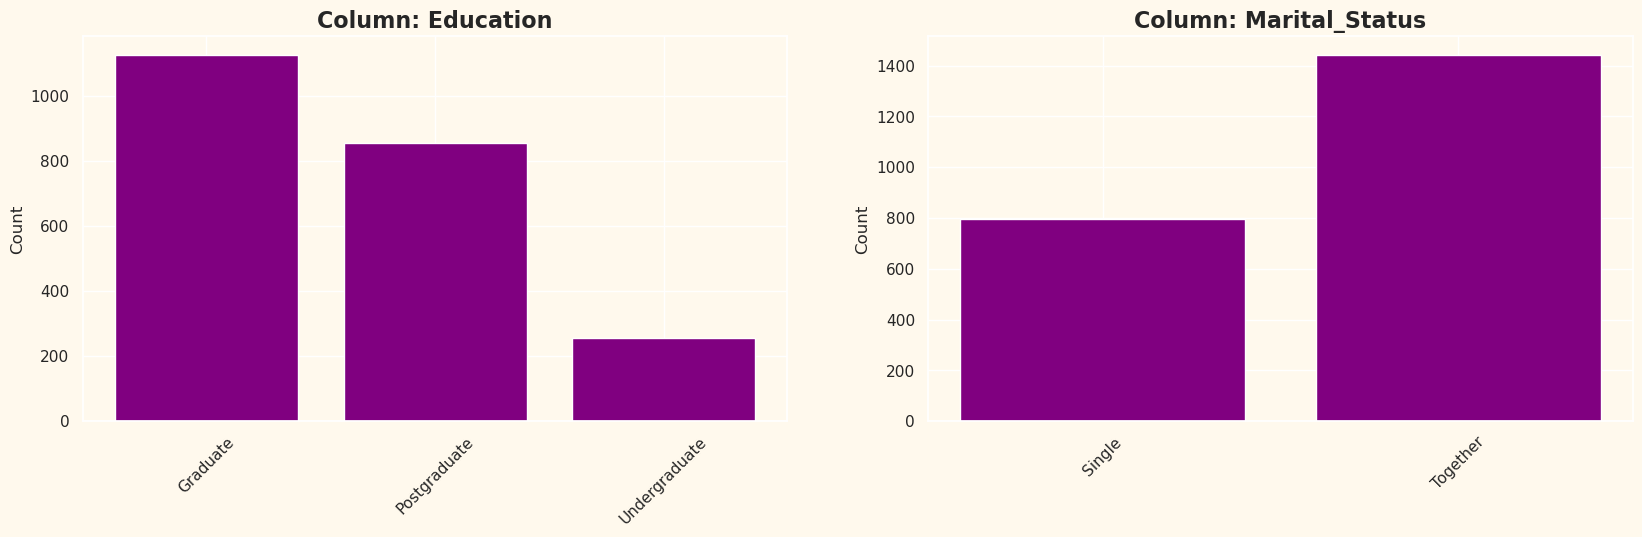

In [61]:
cols = ["Education", "Marital_Status"]
fig_nr_columns = 2
fig_nr_rows = 1 + (len(cols) // fig_nr_columns) if len(cols) % fig_nr_columns != 0 else len(cols) // fig_nr_columns
fig = plt.figure(1, figsize=[20,5])

for k in range(len(cols)):
    data_agg = data.groupby(cols[k]).size().reset_index()
    x = data_agg[cols[k]]
    y = data_agg[0]
    ypos = np.arange(len(x))
    ax = fig.add_subplot(fig_nr_rows, fig_nr_columns, k+1)
    plt.subplots_adjust(hspace=0.3, wspace=0.2)
    ax.bar(ypos, y, color='purple')
    ax.tick_params(axis='x', rotation=45)
    plt.xticks(ypos, x)
    ax.set_title("Column: {}".format(cols[k]), fontweight='bold', fontsize=16)  # Adjust the fontsize as needed
    ax.set_ylabel("Count", fontsize=12)  # Adjust the fontsize as needed

plt.show()

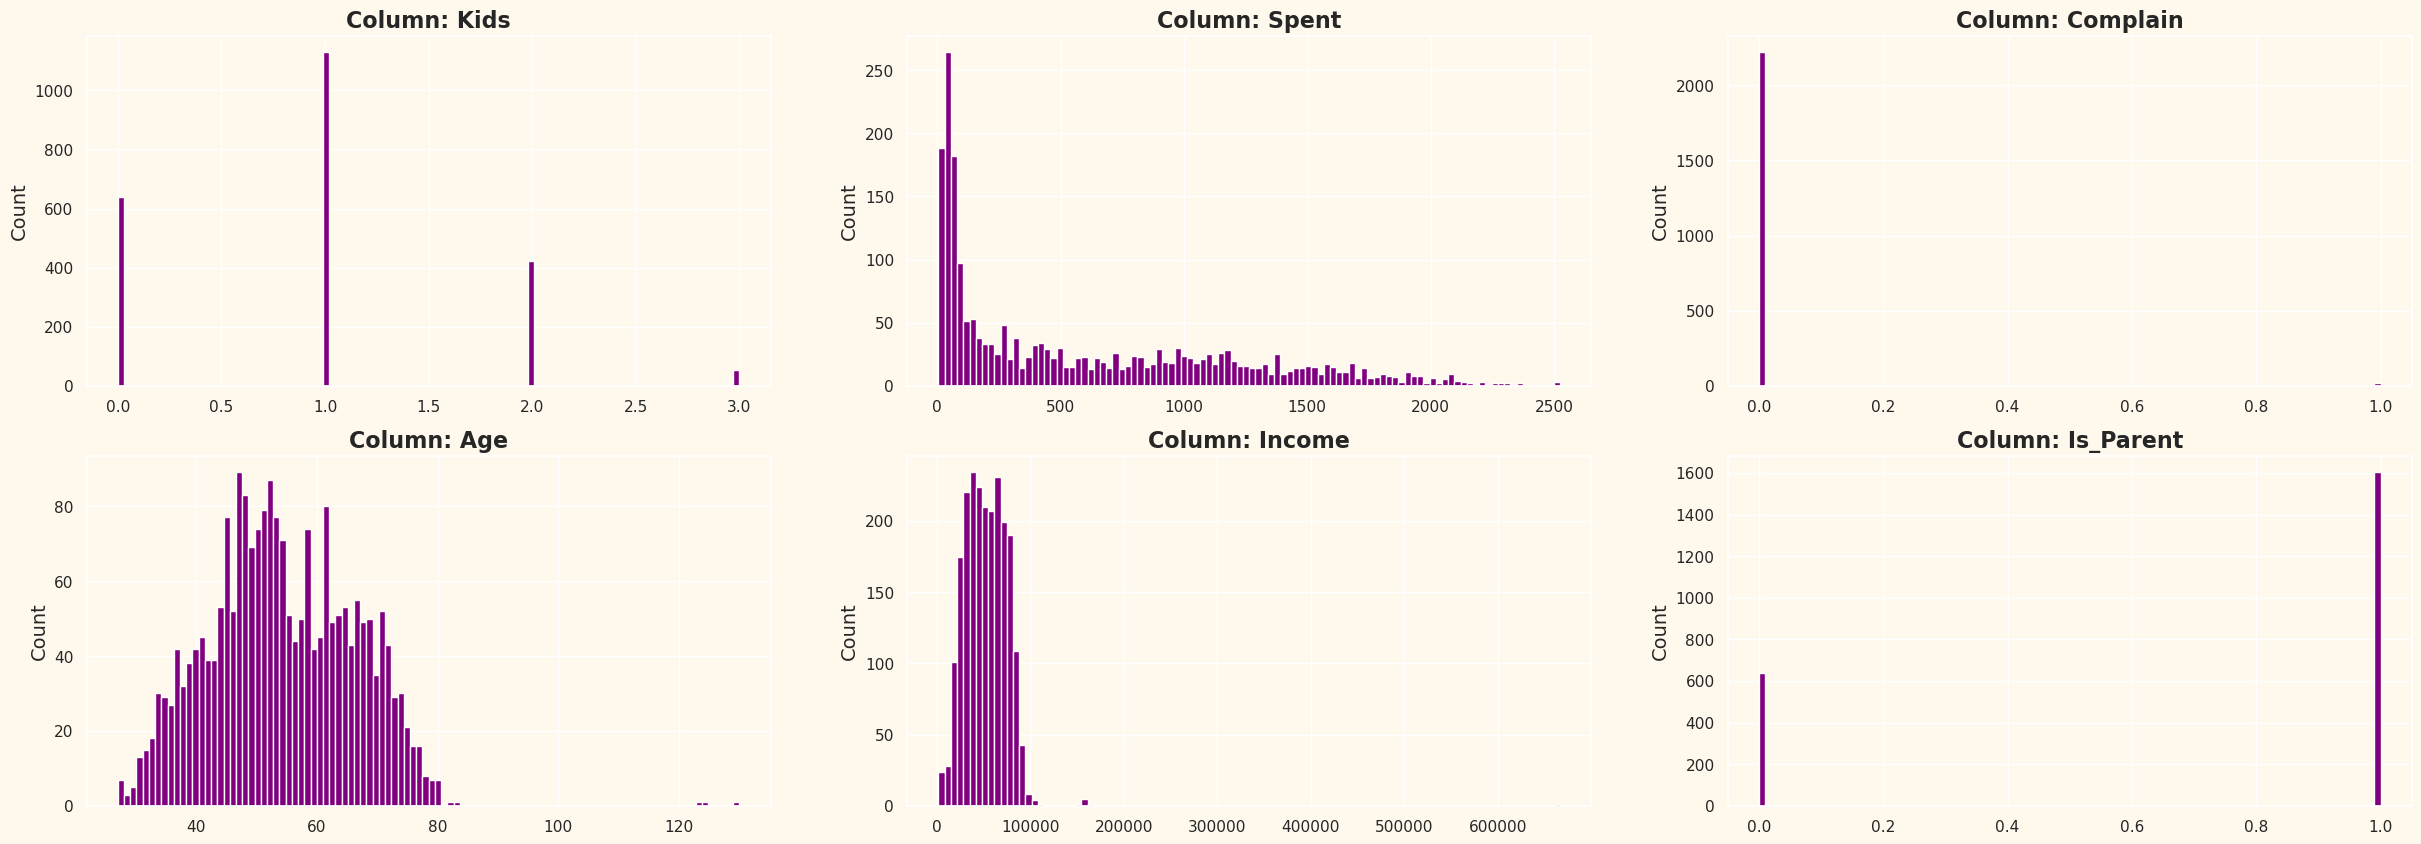

In [62]:
cols = ["Kids", "Spent", "Complain", "Age", "Income", "Is_Parent"]
fig_nr_columns = 3
fig_nr_rows = 1 + (len(cols) // fig_nr_columns) if len(cols) % fig_nr_columns != 0 else len(cols) // fig_nr_columns
fig = plt.figure(1, figsize=[30,10])

for k in range(len(cols)):
    num_bins = 100
    ax = fig.add_subplot(fig_nr_rows, fig_nr_columns, k+1)
    ax.hist(data[cols[k]], num_bins, color='purple')
    plt.title("Column: {}".format(cols[k]), fontweight='bold',fontsize=16)
    plt.ylabel("Count", fontsize=14)

plt.show()

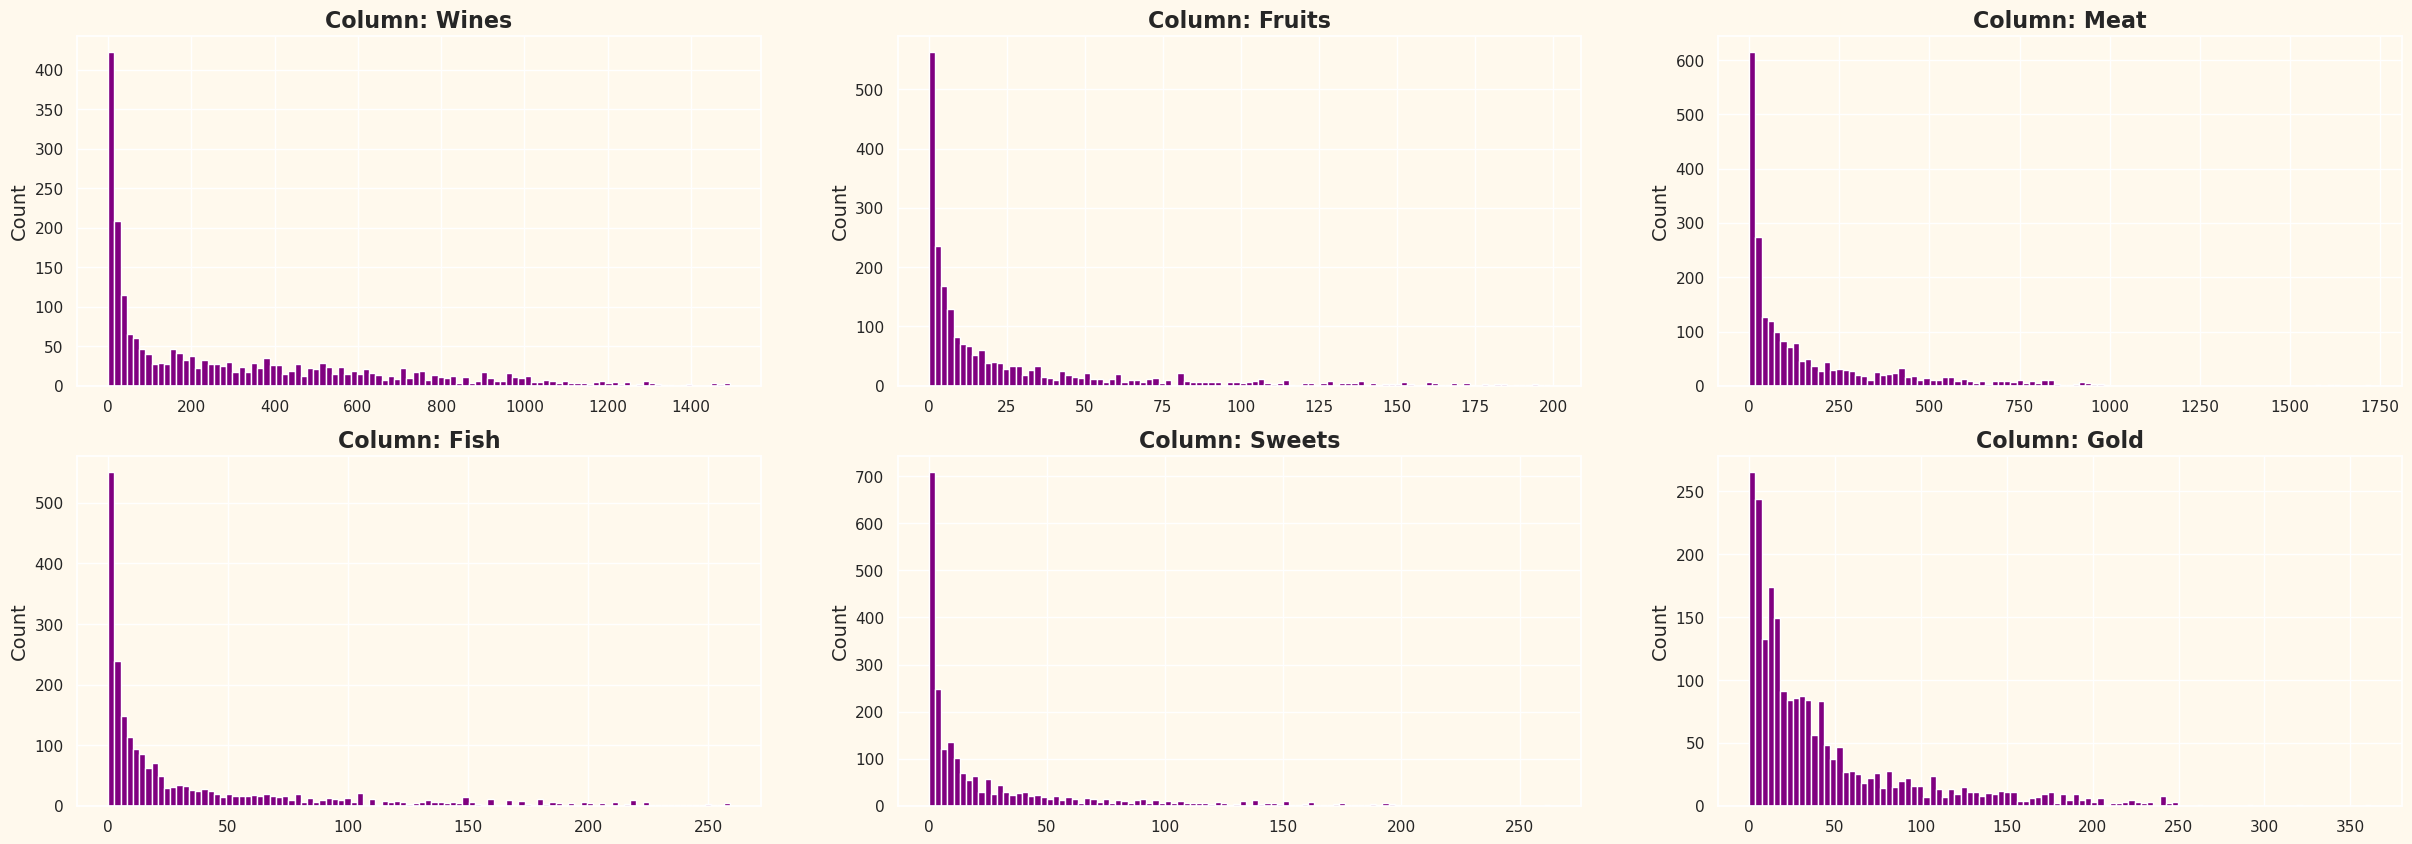

In [63]:
cols = ["Wines", "Fruits", "Meat", "Fish", "Sweets","Gold"]
fig_nr_columns = 3
fig_nr_rows = 1 + (len(cols) // fig_nr_columns) if len(cols) % fig_nr_columns != 0 else len(cols) // fig_nr_columns
fig = plt.figure(1, figsize=[30,10])

for k in range(len(cols)):
    num_bins = 100
    ax = fig.add_subplot(fig_nr_rows, fig_nr_columns, k+1)
    ax.hist(data[cols[k]], num_bins, color='purple')
    plt.title("Column: {}".format(cols[k]), fontweight='bold',fontsize=16)
    plt.ylabel("Count", fontsize=14)

plt.show()

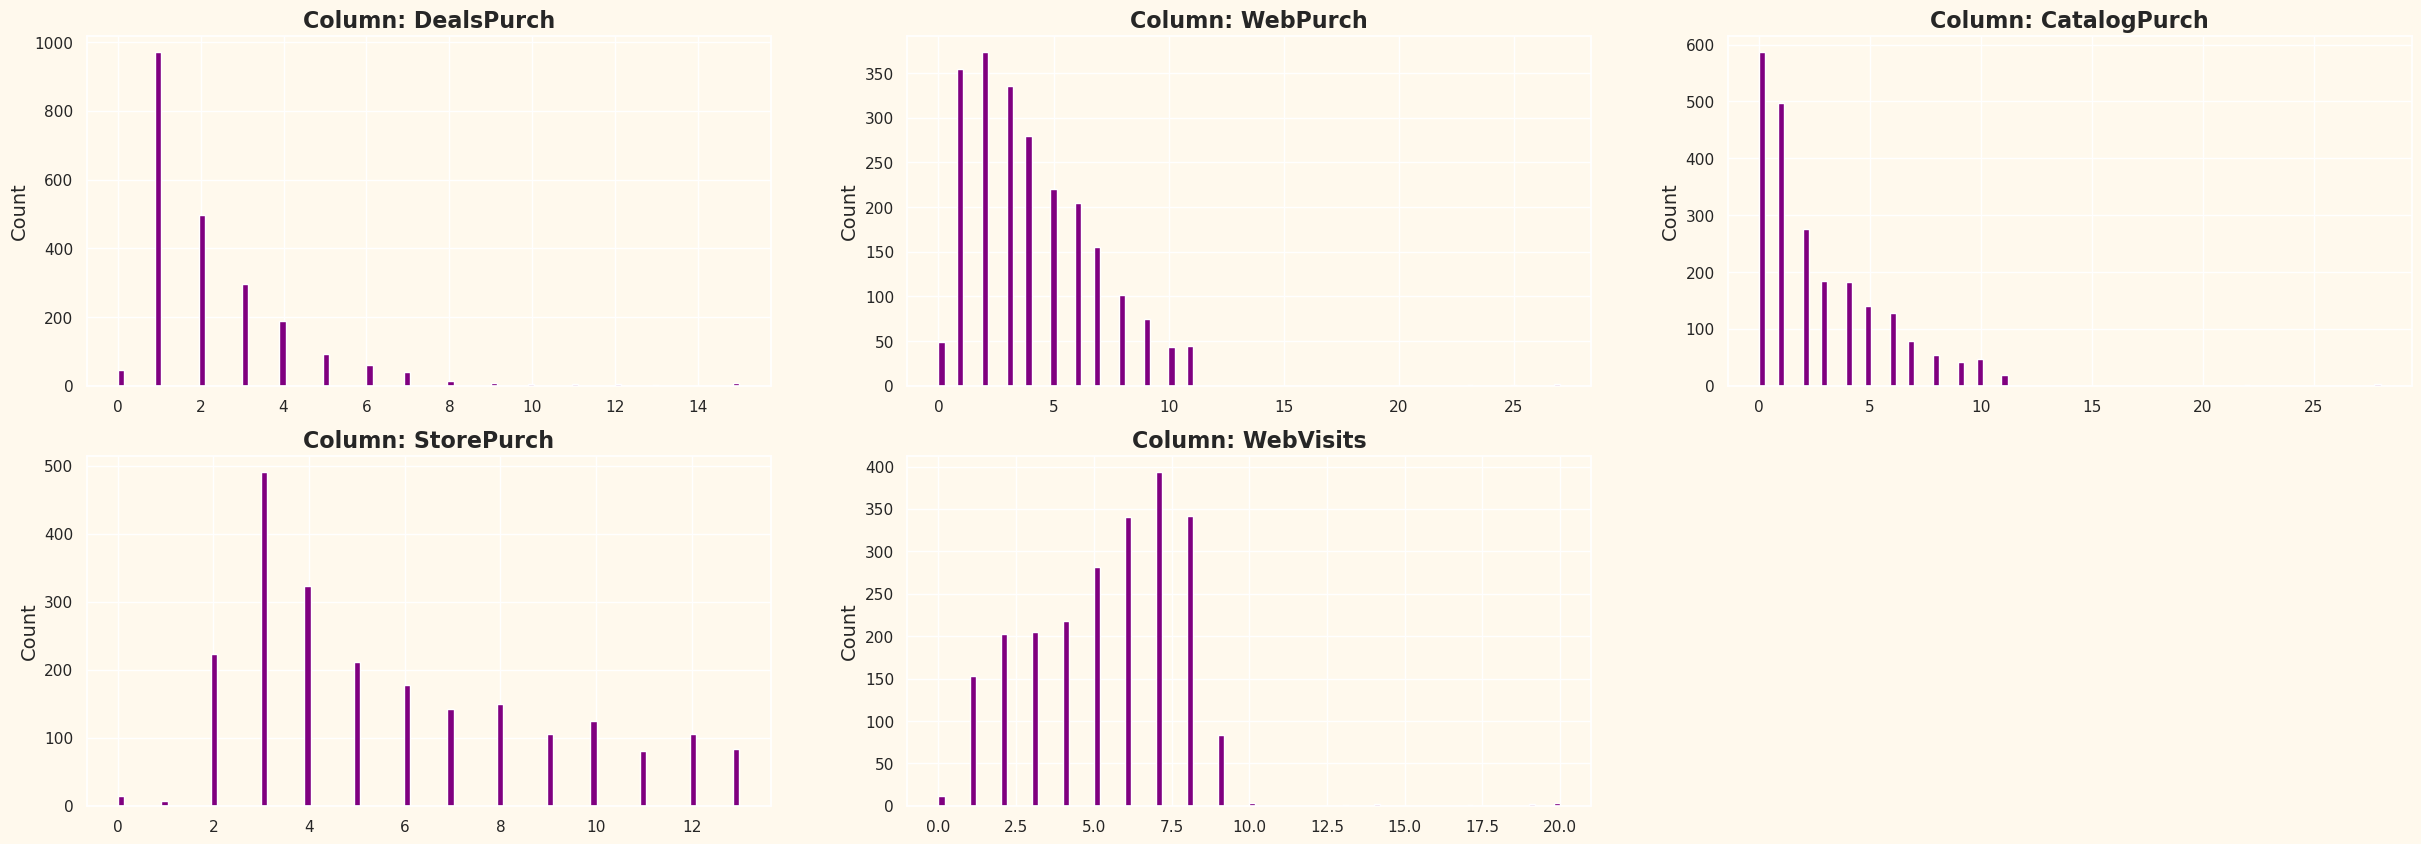

In [64]:
cols = ["DealsPurch", "WebPurch", "CatalogPurch", "StorePurch", "WebVisits"]
fig_nr_columns = 3
fig_nr_rows = 1 + (len(cols) // fig_nr_columns) if len(cols) % fig_nr_columns != 0 else len(cols) // fig_nr_columns
fig = plt.figure(1, figsize=[30,10])

for k in range(len(cols)):
    num_bins = 100
    ax = fig.add_subplot(fig_nr_rows, fig_nr_columns, k+1)
    ax.hist(data[cols[k]], num_bins, color='purple')
    plt.title("Column: {}".format(cols[k]), fontweight='bold',fontsize=16)
    plt.ylabel("Count", fontsize=14)

plt.show()

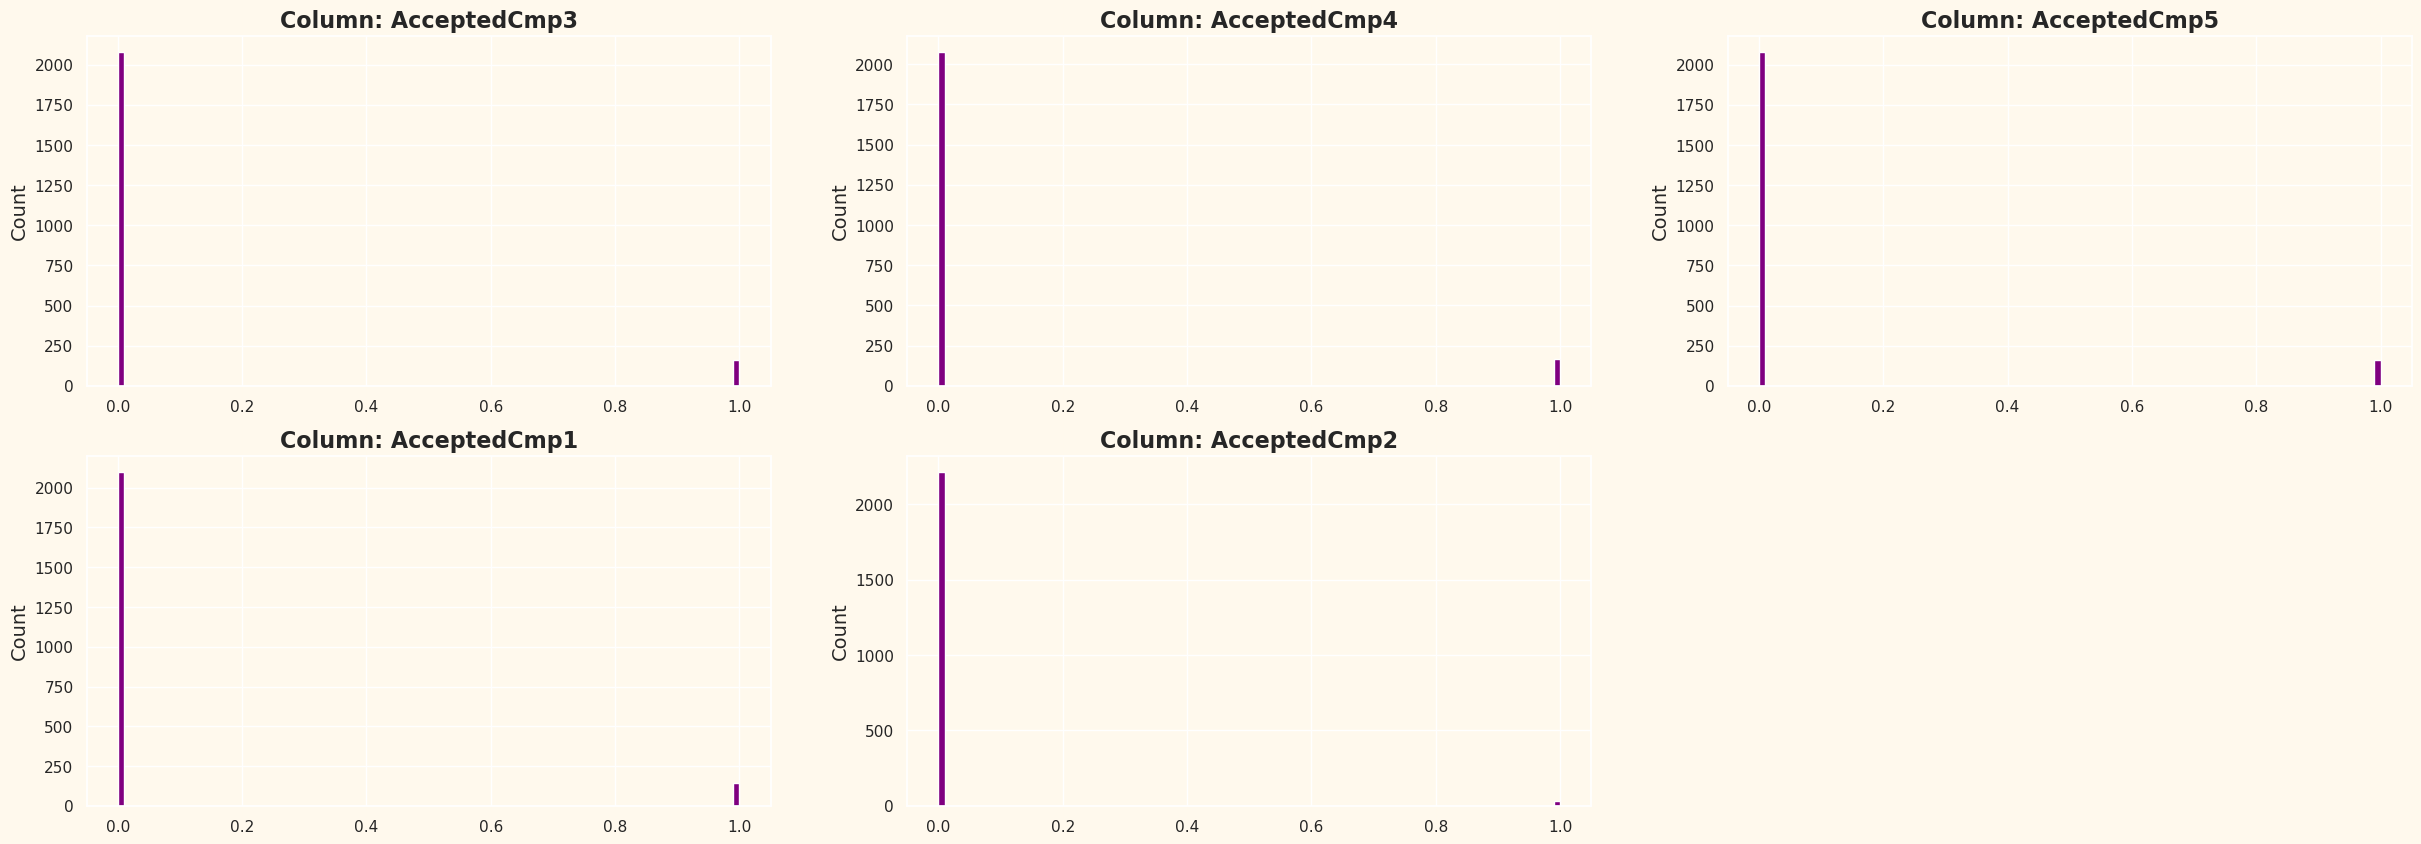

In [65]:
cols = ["AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2"]
fig_nr_columns = 3
fig_nr_rows = 1 + (len(cols) // fig_nr_columns) if len(cols) % fig_nr_columns != 0 else len(cols) // fig_nr_columns
fig = plt.figure(1, figsize=[30,10])

for k in range(len(cols)):
    num_bins = 100
    ax = fig.add_subplot(fig_nr_rows, fig_nr_columns, k+1)
    ax.hist(data[cols[k]], num_bins, color='purple')
    plt.title("Column: {}".format(cols[k]), fontweight='bold',fontsize=16)
    plt.ylabel("Count", fontsize=14)

plt.show()

<Figure size 640x480 with 0 Axes>

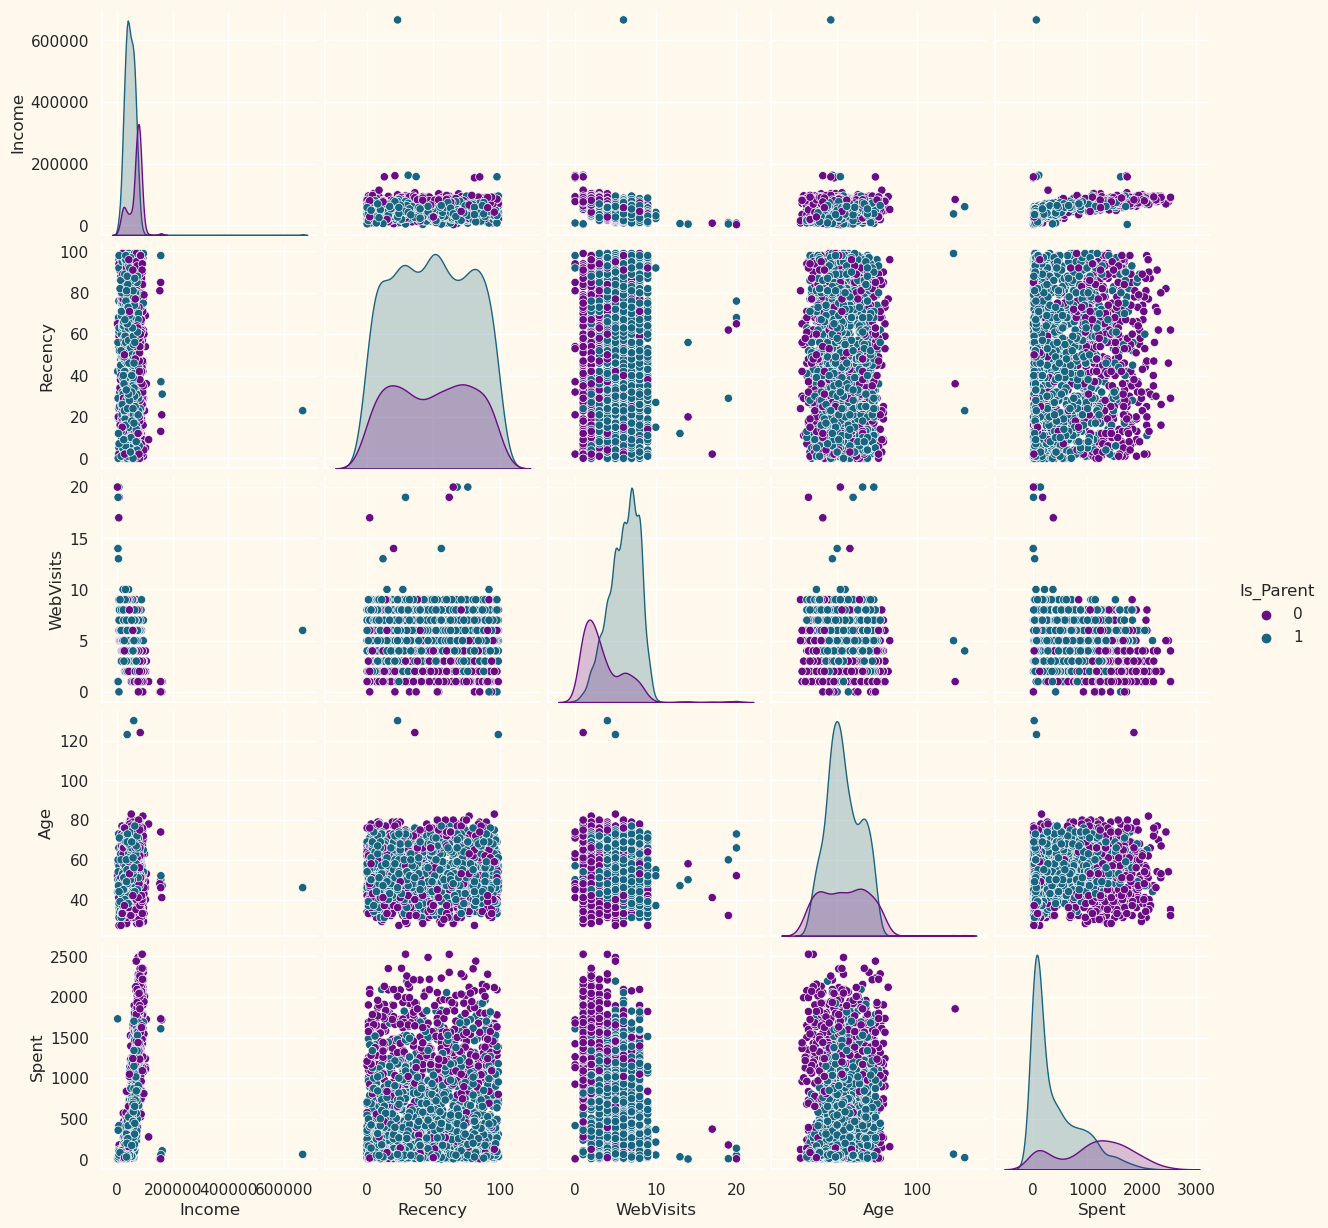

In [68]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#6a0d83", "#5B267B", "#726974", "#42838C", "#119DA4", "#19647E"]
cmap = colors.ListedColormap(["#6a0d83", "#5B267B", "#726974", "#42838C", "#119DA4", "#19647E"])
To_Plot = [ "Income", "Recency", "WebVisits", "Age", "Spent","Is_Parent"]
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#6a0d83", "#19647E" ]))
plt.show()

In [69]:
data.groupby(by=["Is_Parent"]).mean(numeric_only=True)

,ID,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,DealsPurch,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,Spent
Is_Parent,,,,,,,,,,,,,,,,,,,,,
0,5589.625392,65705.565561,49.086207,487.305643,52.357367,372.609718,76.547022,53.061129,64.148903,1.139498,...,0.075235,0.108150,0.216301,0.172414,0.028213,0.006270,0.264890,54.416928,0.000000,1106.029781
1,5593.169164,46865.626027,49.118602,230.908240,15.925718,85.045568,21.985019,16.709114,36.006242,2.797129,...,0.071785,0.061174,0.015605,0.021223,0.007491,0.010612,0.102996,54.105493,1.328964,406.579900


In [70]:
data.groupby(by=["Is_Parent","Spent"]).mean(numeric_only=True)

ID   Income  Recency   Wines  Fruits   Meat   Fish  \
Is_Parent Spent                                                           
0         6      4755.0  79392.5     50.5     1.5     1.0    1.0    1.0   
          8      9021.5  79327.0     75.0     1.5     1.0    2.5    1.0   
          14     7635.0  14774.0     15.0     1.5     0.5    1.0    5.0   
          15     9553.0   7500.0     94.0     0.0     2.0    3.0    4.0   
          16     3436.0  23850.0     55.0     5.0     1.5    2.5    1.5   
...                 ...      ...      ...     ...     ...    ...    ...   
1         1956   2975.0  85606.0     89.0   717.0    42.0  864.0  219.0   
          1957   4355.0  87771.0     61.0  1492.0    38.0  287.0   50.0   
          2053   1103.0  81929.0     60.0  1486.0    55.0  278.0   49.0   
          2092   3403.0  78952.0     11.0  1170.0    19.0  594.0   99.0   
          2194   5236.0  77568.0     30.0  1230.0     0.0  396.0  232.0   

                 Sweets   Gold  DealsPurch  ...  WebVisits  AcceptedCmp3  \
Is_Parent Spent                             ...                            
0         6         0.5    1.0         0.0  ...        7.0           0.0   
          8         1.0    1.0         7.5  ...       10.0           0.0   
          14        2.5    3.5         1.0  ...        5.5           0.0   
          15        1.0    5.0         1.0  ...        6.0           0.0   
          16        1.5    4.0         1.0  ...        4.0           0.5   
...                 ...    ...         ...  ...        ...           ...   
1         1956     30.0   84.0         2.0  ...        3.0           0.0   
          1957     57.0   33.0         1.0  ...        6.0           0.0   
          2053      0.0  185.0         2.0  ...        6.0           1.0   
          2092     76.0  134.0         2.0  ...        6.0           0.0   
          2194    178.0  158.0         1.0  ...        5.0           0.0   

                 AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
Is_Parent Spent                                                           
0         6               0.0           0.0           0.0           0.0   
          8               0.0           0.0           0.0           0.0   
          14              0.0           0.0           0.0           0.0   
          15              0.0           0.0           0.0           0.0   
          16              0.0           0.0           0.0           0.0   
...                       ...           ...           ...           ...   
1         1956            0.0           0.0           1.0           0.0   
          1957            1.0           1.0           1.0           1.0   
          2053            0.0           1.0           0.0           0.0   
          2092            0.0           0.0           0.0           0.0   
          2194            1.0           1.0           1.0           0.0   

                 Complain  Response   Age  Kids  
Is_Parent Spent                                  
0         6           0.0       0.0  53.0   0.0  
          8           0.0       0.0  63.0   0.0  
          14          0.0       0.0  62.5   0.0  
          15          0.0       0.0  36.0   0.0  
          16          0.0       0.0  42.0   0.0  
...                   ...       ...   ...   ...  
1         1956        0.0       0.0  47.0   1.0  
          1957        0.0       1.0  64.0   1.0  
          2053        0.0       1.0  47.0   1.0  
          2092        0.0       0.0  65.0   1.0  
          2194        0.0       0.0  44.0   1.0  

[1221 rows x 23 columns]

In [71]:
data.groupby(by=["Spent","Gold"]).mean(numeric_only=True)

ID   Income  Recency   Wines  Fruits   Meat   Fish  Sweets  \
Spent Gold                                                                    
5     1     11110.0   3502.0     56.0     2.0     1.0    1.0    0.0     0.0   
6     1      4755.0  79392.5     50.5     1.5     1.0    1.0    1.0     0.5   
8     0      5824.0  34578.0      1.0     7.0     0.0    1.0    0.0     0.0   
      1      9021.5  79327.0     75.0     1.5     1.0    2.5    1.0     1.0   
      2     10104.0  33590.0     65.0     4.0     0.0    2.0    0.0     0.0   
...             ...      ...      ...     ...     ...    ...    ...     ...   
2352  108    5453.0  90226.0     26.0  1083.0   108.0  649.0  253.0   151.0   
2440  178    4475.0  69098.0     82.0  1315.0    22.0  780.0  145.0     0.0   
2486  182    4580.0  75759.0     46.0  1394.0    22.0  708.0   89.0    91.0   
2524  33     1763.0  87679.0     62.0  1259.0   172.0  815.0   97.0   148.0   
2525  96     5542.5  90638.0     29.0  1156.0   120.0  915.0   94.0   144.0   

            DealsPurch  WebPurch  ...  AcceptedCmp3  AcceptedCmp4  \
Spent Gold                        ...                               
5     1            0.0       0.0  ...           0.0           0.0   
6     1            0.0       0.0  ...           0.0           0.0   
8     0            1.0       1.0  ...           0.0           0.0   
      1            7.5       0.0  ...           0.0           0.0   
      2            1.0       1.0  ...           0.0           0.0   
...                ...       ...  ...           ...           ...   
2352  108          1.0       4.0  ...           0.0           0.0   
2440  178          1.0       7.0  ...           0.0           0.0   
2486  182          1.0       9.0  ...           1.0           0.0   
2524  33           1.0       7.0  ...           1.0           0.0   
2525  96           1.0       3.0  ...           0.0           0.0   

            AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
Spent Gold                                                                 
5     1              0.0           0.0           0.0       0.0       0.0   
6     1              0.0           0.0           0.0       0.0       0.0   
8     0              0.0           0.0           0.0       0.0       0.0   
      1              0.0           0.0           0.0       0.0       0.0   
      2              0.0           0.0           0.0       0.0       0.0   
...                  ...           ...           ...       ...       ...   
2352  108            0.0           1.0           0.0       0.0       0.0   
2440  178            0.0           0.0           0.0       0.0       0.0   
2486  182            1.0           1.0           0.0       0.0       1.0   
2524  33             1.0           1.0           0.0       0.0       1.0   
2525  96             1.0           0.0           0.0       0.0       0.5   

             Age  Kids  Is_Parent  
Spent Gold                         
5     1     50.0   1.0        1.0  
6     1     53.0   0.0        0.0  
8     0     51.0   3.0        1.0  
      1     63.0   0.0        0.0  
      2     49.0   3.0        1.0  
...          ...   ...        ...  
2352  108   67.0   0.0        0.0  
2440  178   74.0   0.0        0.0  
2486  182   54.0   0.0        0.0  
2524  33    35.0   0.0        0.0  
2525  96    32.0   0.0        0.0  

[1867 rows x 23 columns]

<Axes: xlabel='WebVisits', ylabel='Count'>

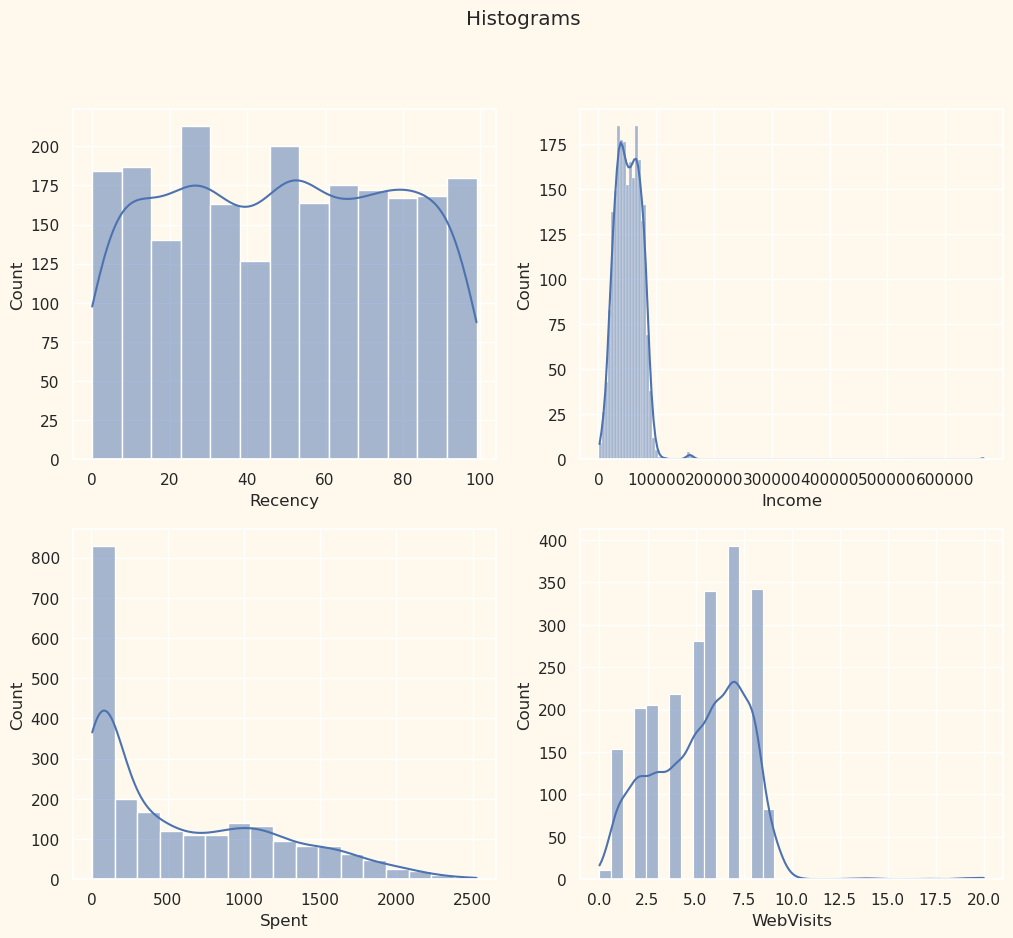

In [93]:
fig, axs = plt.subplots(2,2,figsize=(12,10))
fig.suptitle('Histograms')

sns.histplot(data['Recency'], ax=axs[0,0], kde=True)
sns.histplot(data['Income'], ax=axs[0,1], kde=True)
sns.histplot(data['Spent'], ax=axs[1,0], kde=True)
sns.histplot(data['WebVisits'], ax=axs[1,1], kde=True)

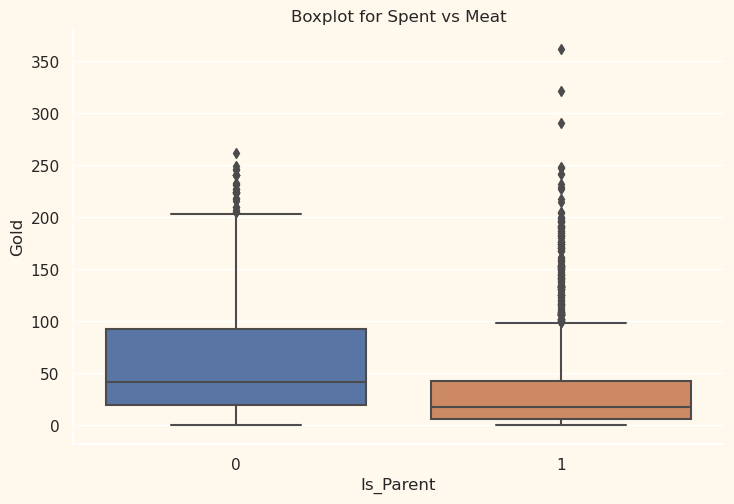

In [99]:
sns.catplot(x="Is_Parent", y="", data=data, kind="box", aspect=1.5)
plt.title("Boxplot for Spent vs Meat")
plt.show()